Obtención de los datos.

In [1]:
import os
import pandas as pd
from shutil import move
from sklearn.model_selection import train_test_split

# Rutas de los archivos
train_base_dir = './dataset/train/'  # Directorio donde están las imágenes de entrenamiento
labels_file = './labels.csv'  # Ruta al archivo CSV con las etiquetas
output_dir = './entreno_organizado/'  # Directorio base para las carpetas de salida (train y test)

# Cargar el archivo CSV con las etiquetas
labels = pd.read_csv(labels_file)

# Crear los directorios de salida para train y test
train_output_dir = os.path.join(output_dir, 'train')
test_output_dir = os.path.join(output_dir, 'test')
os.makedirs(train_output_dir, exist_ok=True)
os.makedirs(test_output_dir, exist_ok=True)

# Función para organizar imágenes por raza y dividir en train/test
def organize_and_split_images(base_dir):
    # Agrupar las imágenes por raza
    grouped = labels.groupby('breed')
    
    for breed, group in grouped:
        breed_images = group['id'].tolist()  # Lista de IDs de imágenes para esta raza
        
        # Dividir imágenes en 80% train y 20% test
        train_images, test_images = train_test_split(breed_images, test_size=0.2, random_state=451025)
        
        # Crear las carpetas de raza en train y test
        train_breed_folder = os.path.join(train_output_dir, breed)
        test_breed_folder = os.path.join(test_output_dir, breed)
        os.makedirs(train_breed_folder, exist_ok=True)
        os.makedirs(test_breed_folder, exist_ok=True)

        # Mover las imágenes de entrenamiento
        for image_id in train_images:
            image_path = os.path.join(base_dir, f"{image_id}.jpg")
            if os.path.exists(image_path):
                move(image_path, os.path.join(train_breed_folder, f"{image_id}.jpg"))
            else:
                print(f"Imagen no encontrada: {image_path}")
        
        # Mover las imágenes de prueba
        for image_id in test_images:
            image_path = os.path.join(base_dir, f"{image_id}.jpg")
            if os.path.exists(image_path):
                move(image_path, os.path.join(test_breed_folder, f"{image_id}.jpg"))
            else:
                print(f"Imagen no encontrada: {image_path}")

# Organizar y dividir las imágenes
organize_and_split_images(train_base_dir)

print("Organización y división en train/test completada.")


Organización y división en train/test completada.


Vamos a modificar los nombres para que sea más sencillo de depurar

In [ ]:
import os

# Ruta base del directorio organizado
base_path = 'entreno_organizado'

# Recorrer los subdirectorios (train y test)
for subset in ['train', 'test']:
    subset_path = os.path.join(base_path, subset)
    
    # Recorrer las carpetas de cada raza
    for breed in os.listdir(subset_path):
        breed_path = os.path.join(subset_path, breed)
        i = 0
        
        # Renombrar imágenes dentro de la carpeta de la raza
        for filename in os.listdir(breed_path):
            old_path = os.path.join(breed_path, filename)
            new_filename = f"{breed}_{subset}_{i}.png"  # Ejemplo: golden_retriever_train_0.png
            new_path = os.path.join(breed_path, new_filename)
            
            os.rename(old_path, new_path)
            i += 1

print('Nombres cambiados.')


Nombres cambiados


Resize de las imágenes para normalizarlas y que tengan el mismo tamaño

In [1]:
# Importar librerías
import os
from PIL import Image

# Seleccionamos la carpeta con las imágenes a normalizar

path = 'entreno_organizado'

# Recorremos las imágenes de la carpeta y vamos cambiando el tamaño
for perro in os.listdir(path):
	i = 0
	for filename in os.listdir(path+'/'+perro):
		# Normalizar
		if (filename[-3:] == 'svg'):
			os.remove(path+'/'+perro+'/'+filename)
		else:
			img = Image.open(path+'/'+perro+'/'+filename)
			img = img.resize((224,224))
			os.remove(path+'/'+perro+'/'+filename)
			img.save(path+'/'+perro+'/'+perro+'_'+str(i)+'.png')
			i += 1

print('Imágenes normalizadas')


Imágenes normalizadas


Vamos a comprobar la información del modelo previa a añadir nuevas imágenes

Número total de clases:  120
Número de imágenes por clase:  {'affenpinscher': 80, 'afghan_hound': 116, 'african_hunting_dog': 86, 'airedale': 107, 'american_staffordshire_terrier': 74, 'appenzeller': 78, 'australian_terrier': 102, 'basenji': 110, 'basset': 82, 'beagle': 105, 'bedlington_terrier': 89, 'bernese_mountain_dog': 114, 'black-and-tan_coonhound': 77, 'blenheim_spaniel': 102, 'bloodhound': 85, 'bluetick': 85, 'border_collie': 72, 'border_terrier': 91, 'borzoi': 75, 'boston_bull': 87, 'bouvier_des_flandres': 86, 'boxer': 75, 'brabancon_griffon': 67, 'briard': 66, 'brittany_spaniel': 73, 'bull_mastiff': 75, 'cairn': 106, 'cardigan': 76, 'chesapeake_bay_retriever': 83, 'chihuahua': 71, 'chow': 93, 'clumber': 80, 'cocker_spaniel': 74, 'collie': 87, 'curly-coated_retriever': 72, 'dandie_dinmont': 89, 'dhole': 76, 'dingo': 80, 'doberman': 74, 'english_foxhound': 86, 'english_setter': 83, 'english_springer': 75, 'entlebucher': 115, 'eskimo_dog': 66, 'flat-coated_retriever': 72, 'frenc

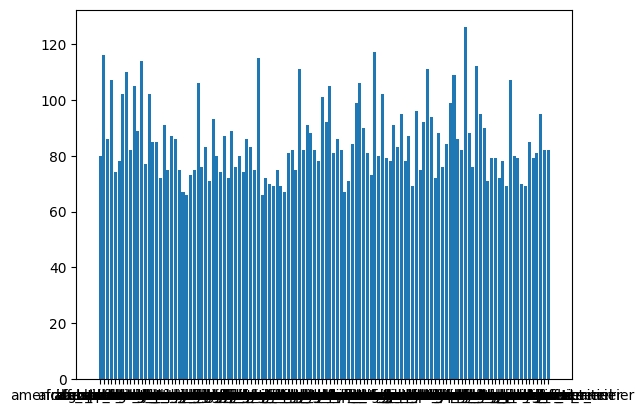

In [2]:
# Script para pre-visualizar las clases y el número de imágenes por clase (descomentar si se quiere probar)

# Importar librerías
import os
import matplotlib.pyplot as plt

# Seleccionamos la carpeta con las diferentes clases
path = 'entreno_organizado'
clases = os.listdir(path) # Lista con las clases
print("Número total de clases: ", len(clases))

# Creamos un diccionario para almacenar el número de imágenes por clase
num_imagenes = {}
for elemento in clases:
    num_imagenes[elemento] = len(os.listdir(path+'/'+elemento))
    
print("Número de imágenes por clase: ", num_imagenes)

# cogemos solo las 5 clases con más imágenes
#num_imagenes = {k: v for k, v in sorted(num_imagenes.items(), key=lambda item: item[1], reverse=True)[:5]}
#clases = list(num_imagenes.keys())
#print("Número de clases: ", len(clases))
#print("Número de imágenes por clase: ", num_imagenes)

# Dibujamos la gráfica
plt.bar(range(len(num_imagenes)), list(num_imagenes.values()), align='center')
plt.xticks(range(len(num_imagenes)), list(num_imagenes.keys()))
plt.show()

Mismo código usando pytorch
(pip install pytorch)?
(pip install torchvision)

In [ ]:
import os
from torchvision import datasets, transforms
from PIL import Image

# Configuración
IMG_HEIGHT, IMG_WIDTH = 224, 224
path = 'entreno_organizado'

# Transformación con augmentación
data_augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop((IMG_HEIGHT, IMG_WIDTH), scale=(0.8, 1.0)),
])

# Directorio con las carpetas de razas
dataset = datasets.ImageFolder(root=path)

# Crear carpeta para guardar imágenes generadas
if not os.path.exists(path):
    os.makedirs(path)

# Generar múltiples imágenes aumentadas por cada imagen original
num_augmentations = 10  # Número de imágenes aumentadas por cada imagen original
for idx, (image, label) in enumerate(dataset):
    label_name = dataset.classes[label]
    label_dir = os.path.join(path, label_name)
    if not os.path.exists(label_dir):
        os.makedirs(label_dir)

    # Generar y guardar varias imágenes aumentadas
    for aug_idx in range(num_augmentations):
        augmented_image = data_augmentation(image)
        augmented_image.save(os.path.join(label_dir, f"aug_{idx}_{aug_idx}.png"))

print("Imágenes aumentadas y guardadas.")


Imágenes aumentadas y guardadas.


Gráficas e información de los datos

Número total de clases:  120
Número de imágenes por clase:  {'affenpinscher': 846, 'afghan_hound': 1220, 'african_hunting_dog': 902, 'airedale': 1119, 'american_staffordshire_terrier': 785, 'appenzeller': 828, 'australian_terrier': 1069, 'basenji': 1151, 'basset': 875, 'beagle': 1099, 'bedlington_terrier': 942, 'bernese_mountain_dog': 1173, 'black-and-tan_coonhound': 813, 'blenheim_spaniel': 1071, 'bloodhound': 891, 'bluetick': 902, 'border_collie': 767, 'border_terrier': 957, 'borzoi': 807, 'boston_bull': 925, 'bouvier_des_flandres': 905, 'boxer': 794, 'brabancon_griffon': 716, 'briard': 711, 'brittany_spaniel': 769, 'bull_mastiff': 799, 'cairn': 1113, 'cardigan': 814, 'chesapeake_bay_retriever': 875, 'chihuahua': 759, 'chow': 973, 'clumber': 845, 'cocker_spaniel': 796, 'collie': 916, 'curly-coated_retriever': 763, 'dandie_dinmont': 955, 'dhole': 813, 'dingo': 845, 'doberman': 792, 'english_foxhound': 921, 'english_setter': 880, 'english_springer': 799, 'entlebucher': 1200, 'eskimo_do

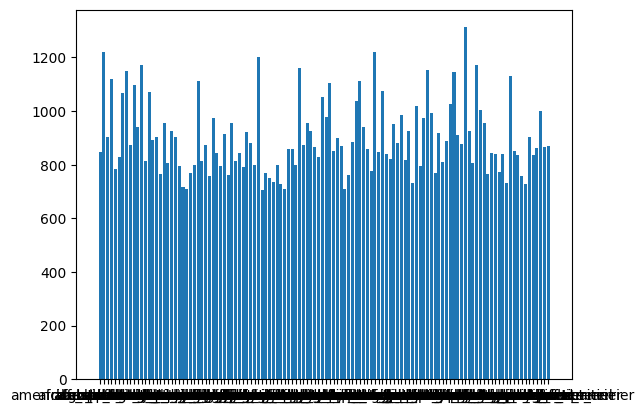

In [ ]:
# Script para pre-visualizar las clases y el número de imágenes por clase (descomentar si se quiere probar)

# Importar librerías
import os
import matplotlib.pyplot as plt

# Seleccionamos la carpeta con las diferentes clases
path = 'entreno_organizado'
clases = os.listdir(path) # Lista con las clases
print("Número total de clases: ", len(clases))

# Creamos un diccionario para almacenar el número de imágenes por clase
num_imagenes = {}
for elemento in clases:
    num_imagenes[elemento] = len(os.listdir(path+'/'+elemento))
    
print("Número de imágenes por clase: ", num_imagenes)

# Dibujamos la gráfica
plt.bar(range(len(num_imagenes)), list(num_imagenes.values()), align='center')
plt.xticks(range(len(num_imagenes)), list(num_imagenes.keys()))
plt.show()

Ahora vamos a realizar una separación entre la parte de train y la parte de test

In [4]:
from torch.utils.data import random_split, DataLoader
from torchvision import datasets, transforms

IMG_HEIGHT, IMG_WIDTH = 224, 224
# Transformación básica (sin augmentación)
transform = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor(),
	# Posible normalización extra
	# transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalización específica
])

# Dataset desde las imágenes generadas
path = 'entreno_organizado'
full_dataset = datasets.ImageFolder(root=path, transform=transform)

# Dividir en entrenamiento y prueba
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Cargar datos con DataLoader
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("Datasets de entrenamiento y prueba listos.")

Datasets de entrenamiento y prueba listos.


Entrenar el modelo 1

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18

# Configuración
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = resnet18(pretrained=True)  # Cargar ResNet18 preentrenado
model.fc = nn.Linear(model.fc.in_features, len(train_loader.dataset.dataset.classes))  # Ajustar a las clases del dataset
model = model.to(device)

criterion = nn.CrossEntropyLoss()  # Definir la función de pérdida
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizador

# Entrenamiento
epochs = 5
for epoch in range(epochs):
    model.train()  # Modo de entrenamiento
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Mover datos a la GPU/CPU

        optimizer.zero_grad()  # Limpiar gradientes
        outputs = model(images)  # Hacer predicciones
        loss = criterion(outputs, labels)  # Calcular pérdida
        loss.backward()  # Propagación hacia atrás
        optimizer.step()  # Actualizar pesos

        running_loss += loss.item()  # Acumular pérdida
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

# Guardar el modelo
torch.save(model.state_dict(), "dog_breed_classifier.pth")
print("Modelo guardado como dog_breed_classifier.pth")


c:\Users\ferna\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ferna\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/5], Loss: 3.2001
Epoch [2/5], Loss: 2.0439
Epoch [3/5], Loss: 1.4380
Epoch [4/5], Loss: 0.9634
Epoch [5/5], Loss: 0.6276
Modelo guardado como dog_breed_classifier.pth


Entrenar el modelo, grad-cam

In [5]:
import torch
import torch.nn as nn
from torchvision.models import resnet18
from sklearn.metrics import accuracy_score

# Configuración
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cargar el modelo
model = resnet18()
model.fc = nn.Linear(model.fc.in_features, len(test_loader.dataset.dataset.classes))  # Ajustar a las clases del dataset
model.load_state_dict(torch.load("dog_breed_classifier.pth"))  # Cargar pesos entrenados
model = model.to(device)
model.eval()  # Modo evaluación

# Evaluación
all_preds = []
all_labels = []

with torch.no_grad():  # Desactivar gradientes
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)  # Predicciones
        _, preds = torch.max(outputs, 1)  # Clases predichas
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calcular precisión
accuracy = accuracy_score(all_labels, all_preds)
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")


Precisión en el conjunto de prueba: 0.6782
